In [1]:
import pandas as pd
import numpy as np
import os
import random
import joblib
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Setting random seed to replicate results
DEFAULT_RANDOM_SEED = 2021

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)

seedEverything(2021)

In [3]:
# Load dataset
df = pd.read_csv('combined_train_df.csv')  # Replace with actual dataset path

# Convert labels
df['label'] = df['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [4]:
df.shape

(175473, 80)

In [5]:
df.head(5)

,Unnamed: 0,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,...,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,label
0,0,51542,2163,2,0,6,0,6,0,3.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,43220,88,1,1,0,0,0,0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,2,80,5302857,2,2,6,6,6,0,3.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,3,53,155,2,2,60,92,30,30,30.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,4,80,50974,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Split features and labels
X = df.drop(columns=['label'])
y = df['label']

<h2>Scaling and splitting into train test </h2>

In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=DEFAULT_RANDOM_SEED)

# Standardize features

scaler = StandardScaler()

exclude_columns = ['label']

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [9]:
# Save scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Saving scaler so that it can be used in the dynamic part and also by the other models

In [10]:
def estimateResult(model,X,y,test_set,actual_vals,model_name):
    model.fit(X,y)
    result = model.predict(test_set)
    tn, fp, fn, tp = confusion_matrix(actual_vals, result).ravel()
    false_positive_rate = fp / (fp + tn)
    result_metrics = {
    "Model": model_name,
    "Accuracy": accuracy_score(actual_vals, result),
    "Precision": precision_score(actual_vals, result),
    "Recall": recall_score(actual_vals, result),
    "F1 Score": f1_score(actual_vals, result),
    "False Positive Rate": false_positive_rate}
    

    y_pred_prob = model.predict_proba(test_set)[:, 1]
    fpr, tpr, thresholds = roc_curve(actual_vals, y_pred_prob)
    auc_score = roc_auc_score(actual_vals, y_pred_prob)

    pyplot.figure(figsize=(8, 6))
    pyplot.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    pyplot.plot([0, 1], [0, 1], linestyle='--', color='gray')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title(f'ROC AUC Curve for {model_name}')
    pyplot.legend(loc='lower right')
    pyplot.show()

    precision, recall, _ = precision_recall_curve(actual_vals, y_pred_prob)
    avg_precision = average_precision_score(actual_vals, y_pred_prob)

    pyplot.figure(figsize=(8, 6))
    pyplot.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.title(f'Precision-Recall Curve for {model_name}')
    pyplot.legend(loc='lower left')
    pyplot.show()
    
    return result_metrics

Above function to plot and calculated performance of models

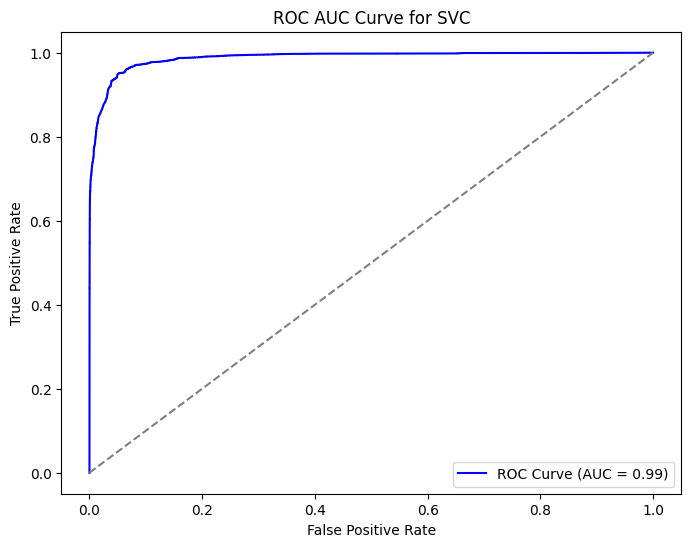

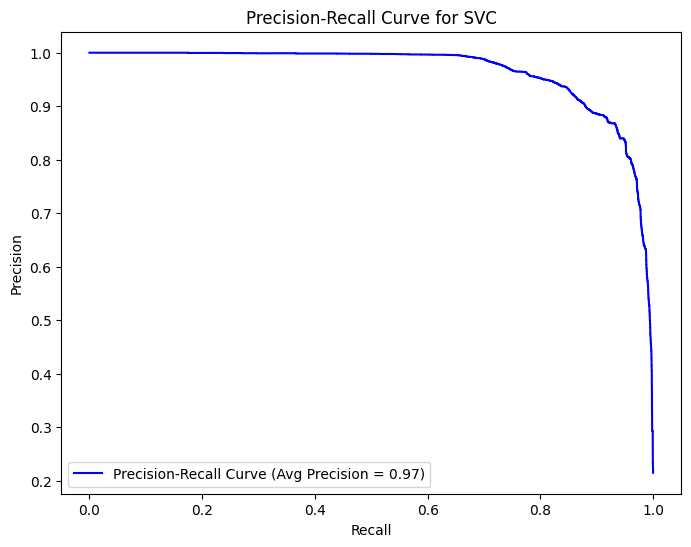

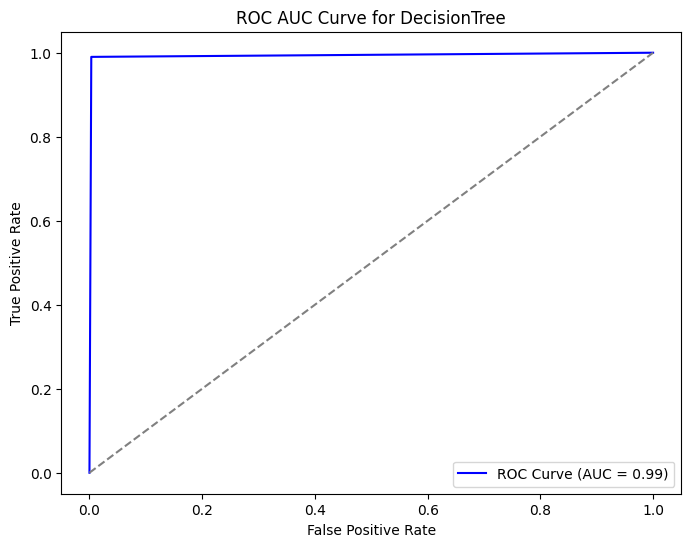

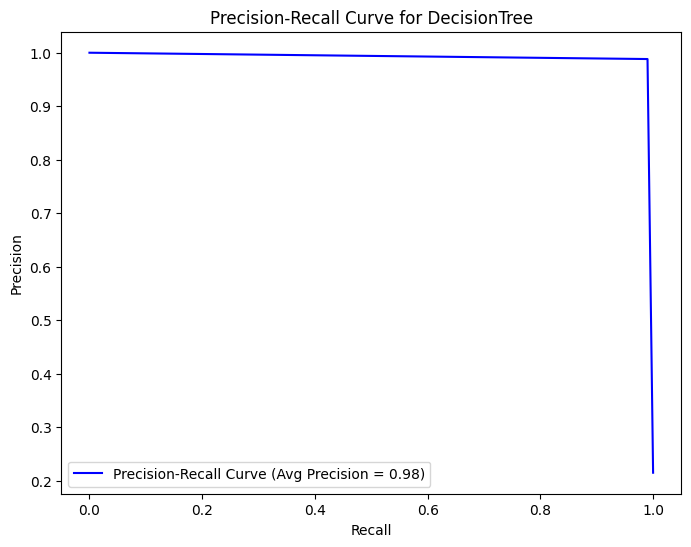

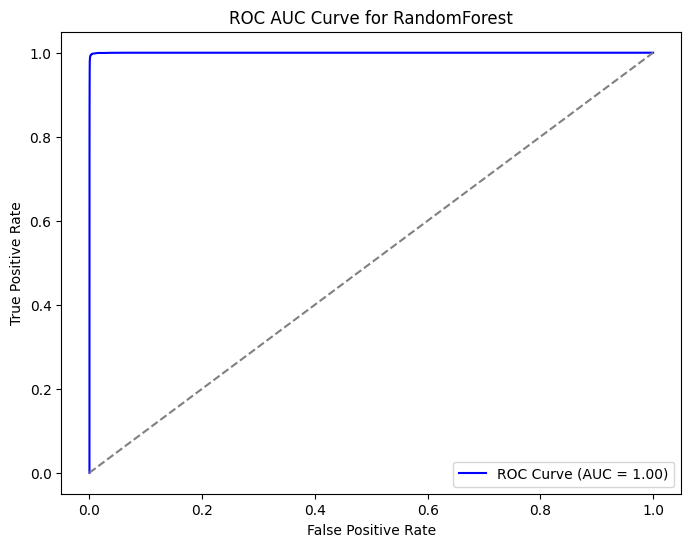

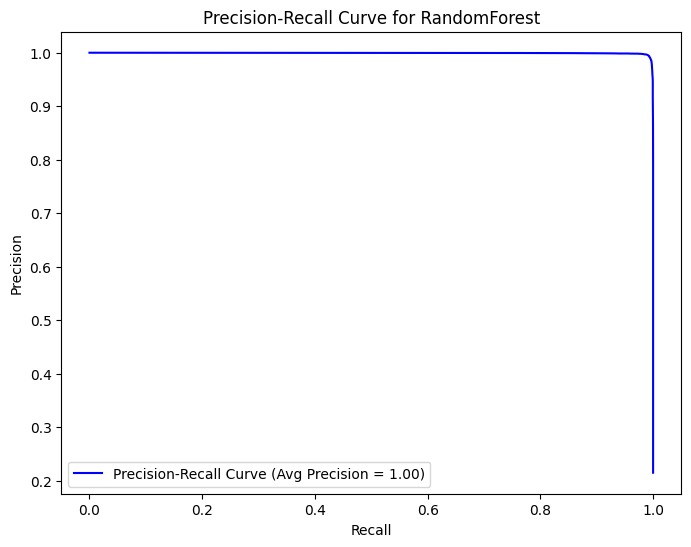

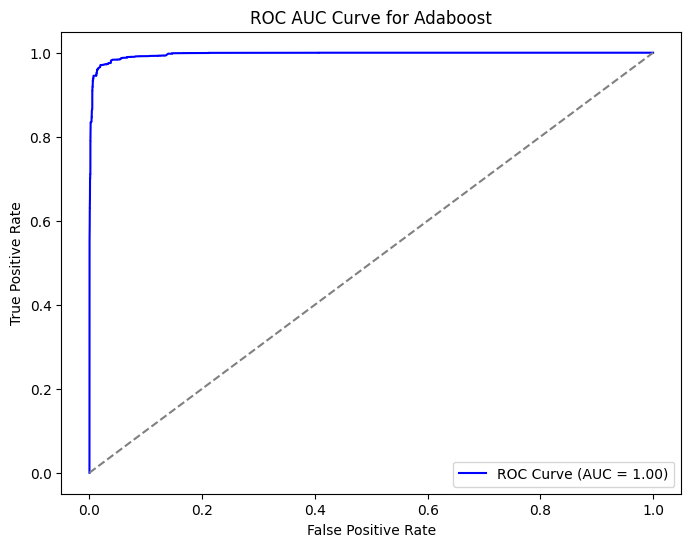

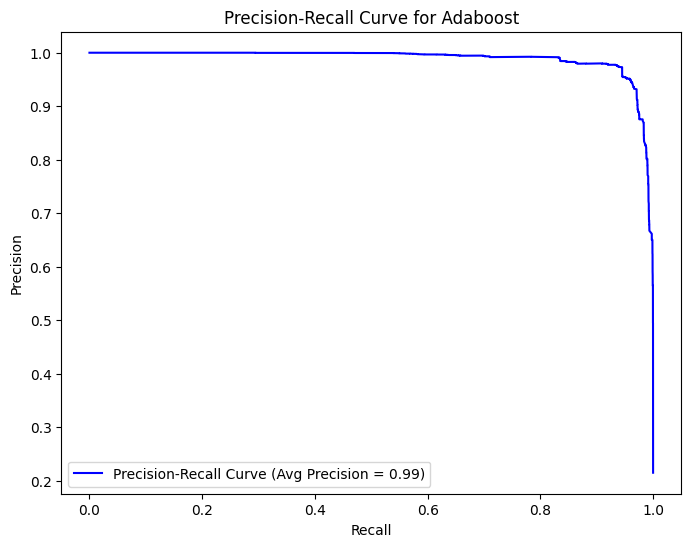

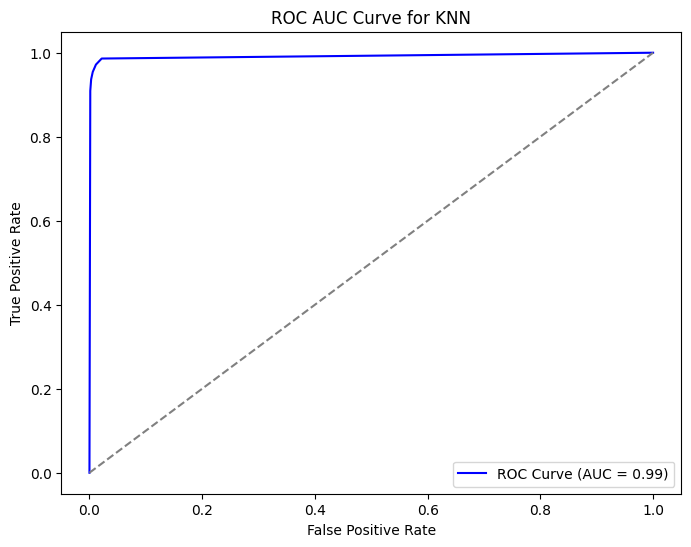

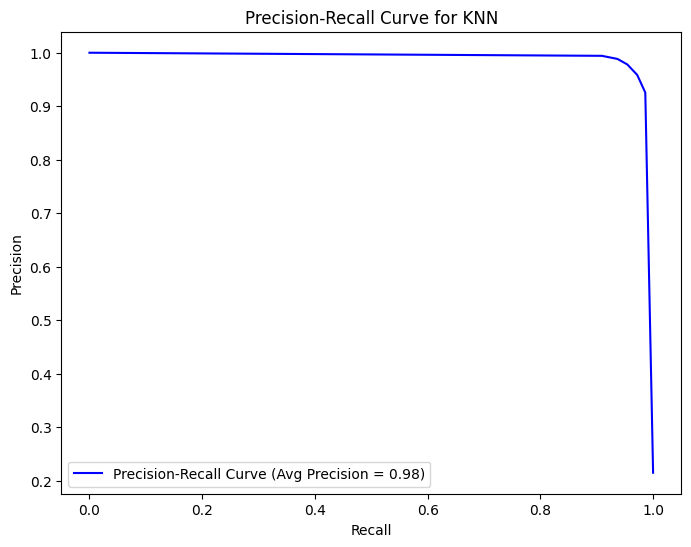

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


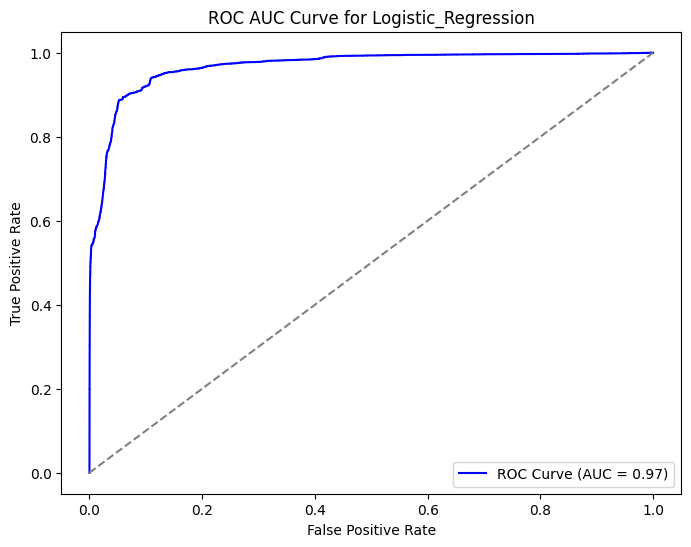

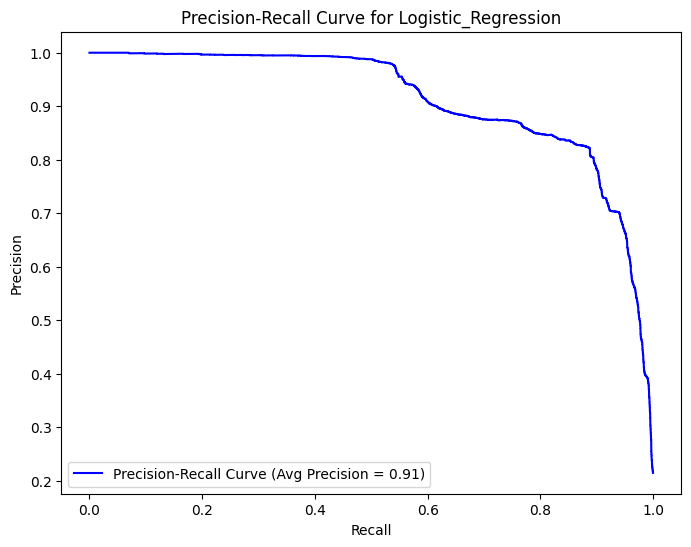

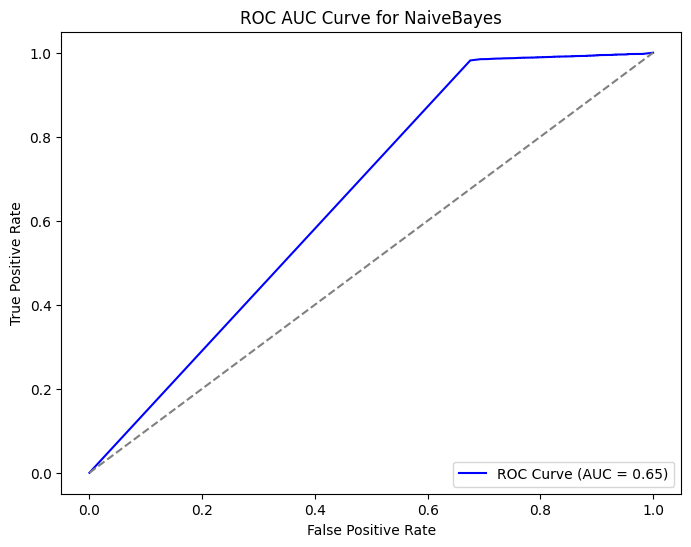

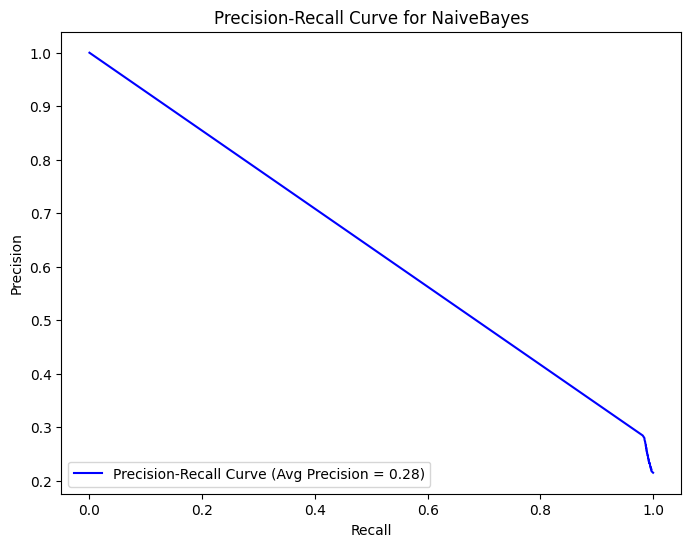

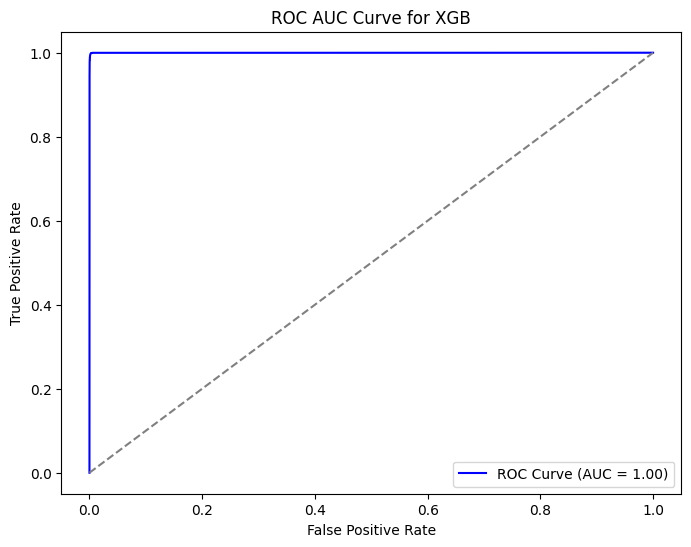

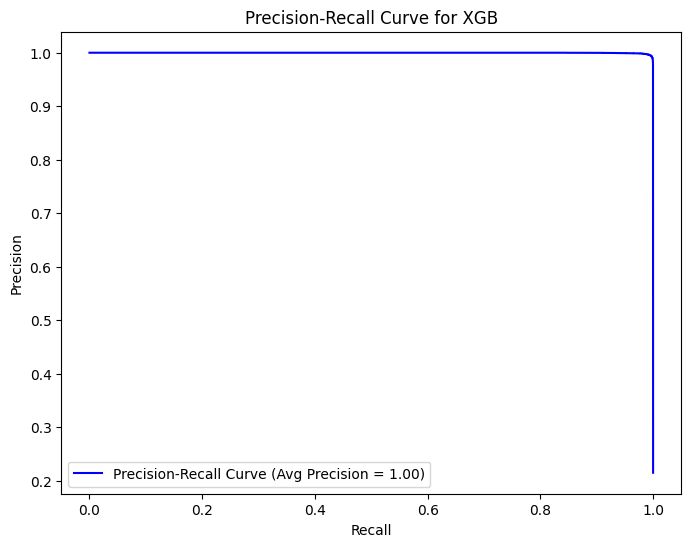

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


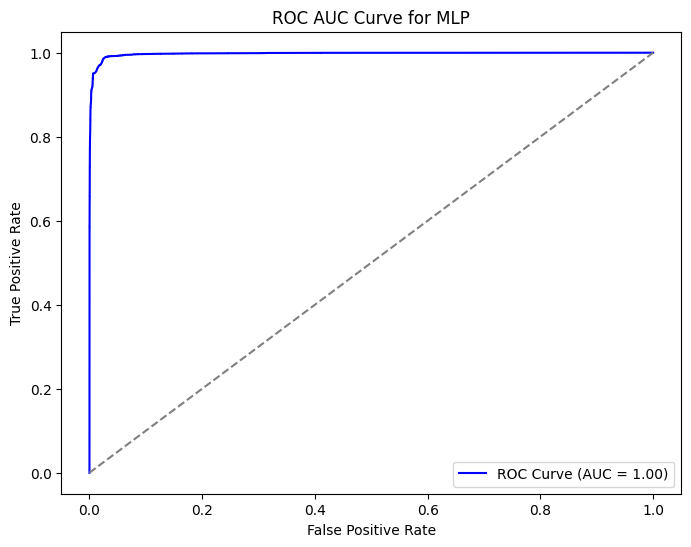

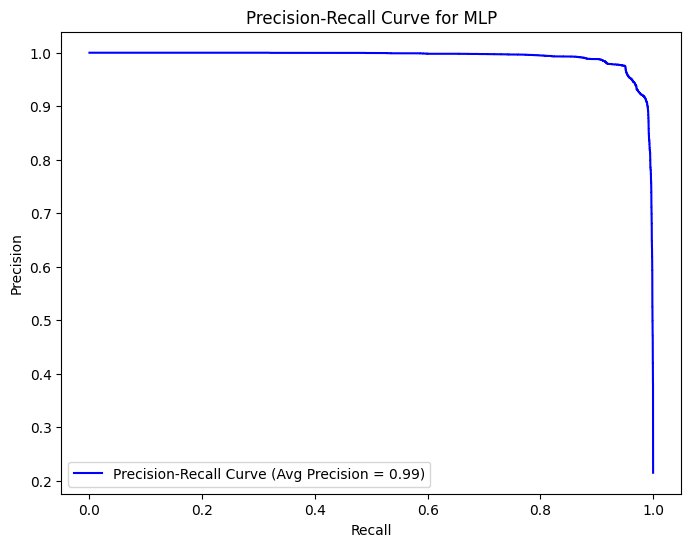

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25462, number of negative: 92104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14794
[LightGBM] [Info] Number of data points in the train set: 117566, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216576 -> initscore=-1.285731
[LightGBM] [Info] Start training from score -1.285731


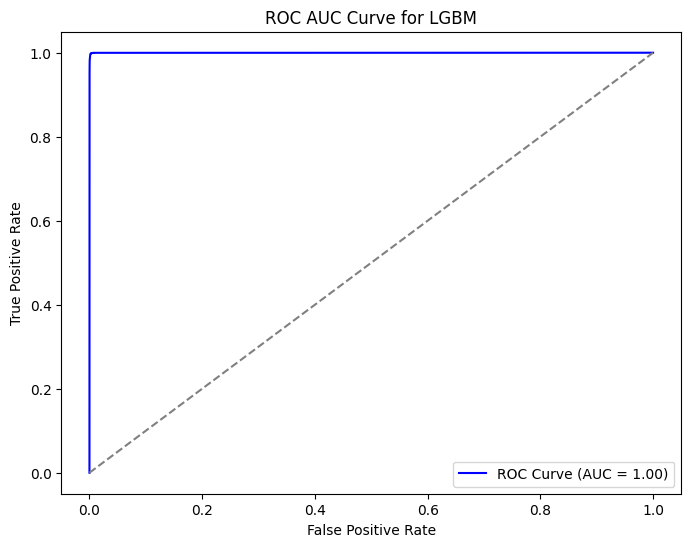

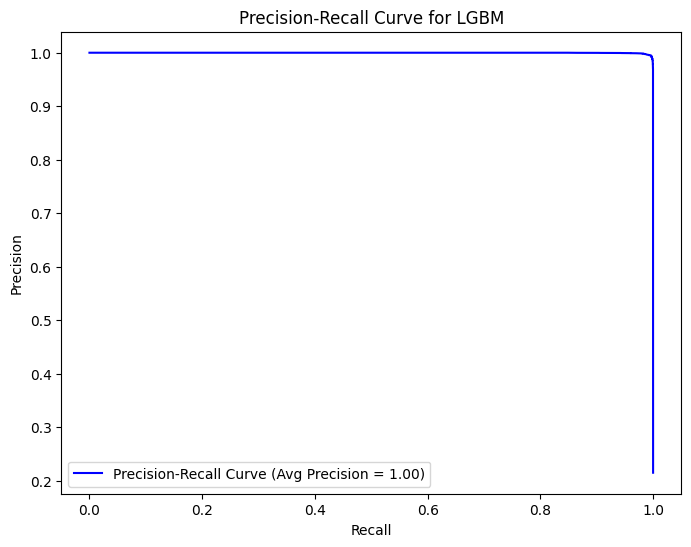

In [11]:
results = []
models = [{"SVC":SVC(probability=True,random_state=DEFAULT_RANDOM_SEED)},{"DecisionTree":DecisionTreeClassifier(random_state=DEFAULT_RANDOM_SEED)},{"RandomForest":RandomForestClassifier(random_state=DEFAULT_RANDOM_SEED)},{"Adaboost":AdaBoostClassifier(random_state=DEFAULT_RANDOM_SEED)},{"KNN":KNeighborsClassifier()},{"Logistic_Regression": LogisticRegression(random_state=DEFAULT_RANDOM_SEED)},{"NaiveBayes" : GaussianNB()},{"XGB" : XGBClassifier(random_state=DEFAULT_RANDOM_SEED)},{"MLP": MLPClassifier(random_state=DEFAULT_RANDOM_SEED)},{"LGBM":LGBMClassifier(random_state=DEFAULT_RANDOM_SEED)}]
for model_obj in models:
    for model_name, actual_model in model_obj.items():
        result = estimateResult(actual_model, X_train, y_train, X_test, y_test,model_name)
        results.append(result)

Plotting curves just to make sure model is not overfitting

In [12]:
non_para_results_df = pd.DataFrame(results)

non_para_results_df

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate
0,SVC,0.954461,0.932497,0.849280,0.888945,0.016799
1,DecisionTree,0.995337,0.988194,0.990102,0.989147,0.003232
2,RandomForest,0.997030,0.993000,0.993160,0.993080,0.001913
3,Adaboost,0.981142,0.976942,0.934176,0.955080,0.006025
4,KNN,0.985598,0.978062,0.954293,0.966031,0.005849
5,Logistic_Regression,0.922945,0.872440,0.750704,0.807007,0.029991
6,NaiveBayes,0.324417,0.240037,0.991712,0.386520,0.857916
7,XGB,0.997962,0.993426,0.997103,0.995261,0.001803
8,MLP,0.982075,0.963533,0.952523,0.957996,0.009850
9,LGBM,0.997928,0.993425,0.996942,0.995180,0.001803


In [13]:
# Save results to CSV
non_para_results_df.to_csv('normal_model_results.csv', index=False)

<h2>Hyper parameter tuning </h2>

In [14]:
param_by_model = [
    {
        'model':{
            'model_name': 'XGB',
            'actual_model': XGBClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'n_estimators': [50, 100]}
    },
    {
    'model':{
        'model_name': 'SVC',
        'actual_model': SVC(probability=True,random_state=DEFAULT_RANDOM_SEED)
    },
    'param_grid' : {
    'C': [0.1, 1, 10]}
    },
    {
        'model':{
            'model_name' : 'KNN',
            'actual_model':KNeighborsClassifier()
        },
        'param_grid' : {
    'n_neighbors': [3, 5, 7]}
    },
    {
        'model':{
            'model_name': 'LGBM',
            'actual_model': LGBMClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'n_estimators': [50, 100]}
    },
    {
        'model':{
            'model_name': 'Adaboost',
            'actual_model':AdaBoostClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'n_estimators': [50, 100]}
    },
    {
        'model':{
            'model_name': 'Logistic Regression',
            'actual_model': LogisticRegression(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'penalty': ['l1', 'l2', 'elasticnet']}
    },
    {
        'model': {
            'model_name': 'Decision Tree',
            'actual_model': DecisionTreeClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'max_depth': [5, 10, None]}
    },
    {
        'model':{
            'model_name' : 'Random Forest',
            'actual_model': RandomForestClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'n_estimators': [50, 100], 'max_depth': [10, None]}
    },
    {
        'model':{
            'model_name': 'MLP',
            'actual_model': MLPClassifier(random_state=DEFAULT_RANDOM_SEED)
        },
        'param_grid' : {
    'hidden_layer_sizes': [(50,), (100,)]}
    }]

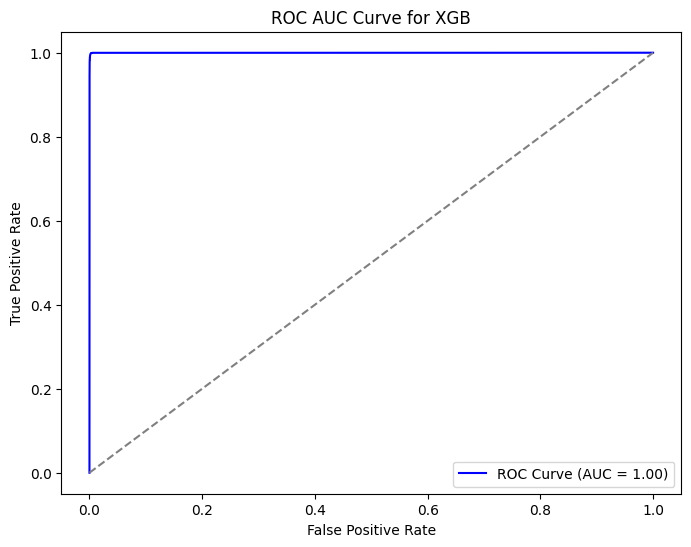

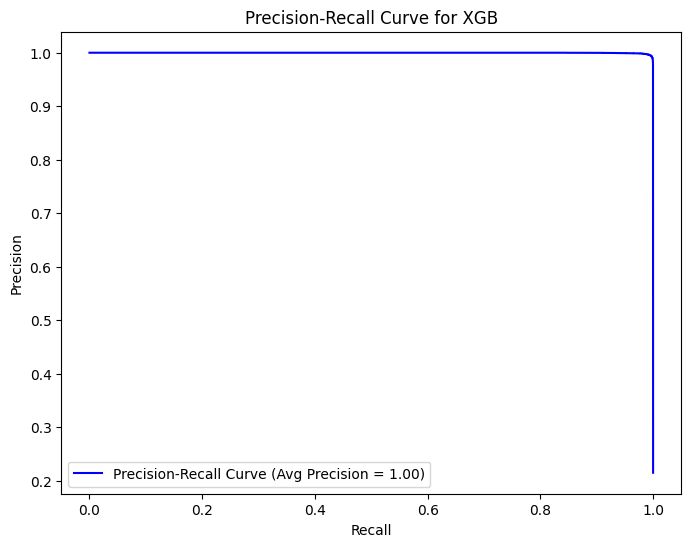

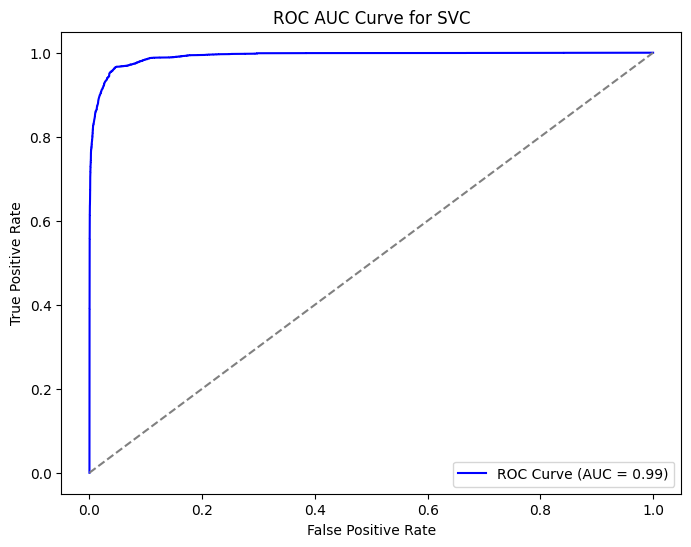

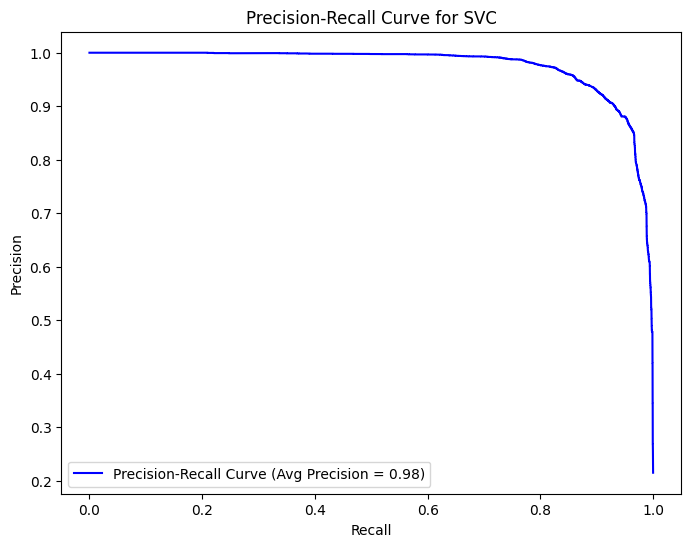

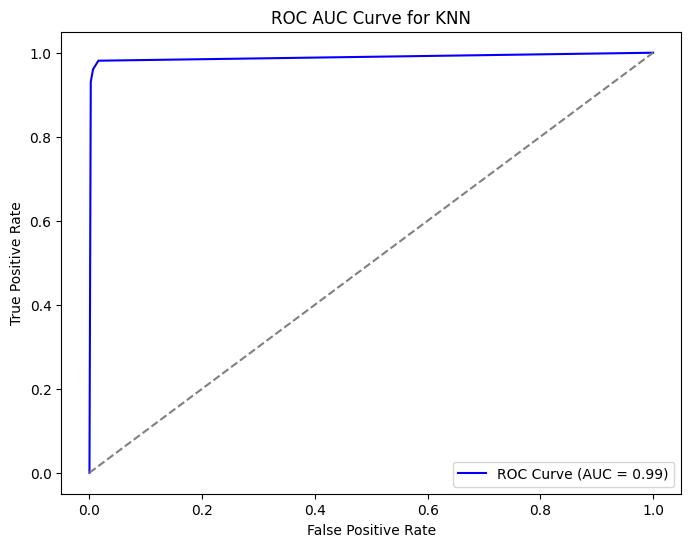

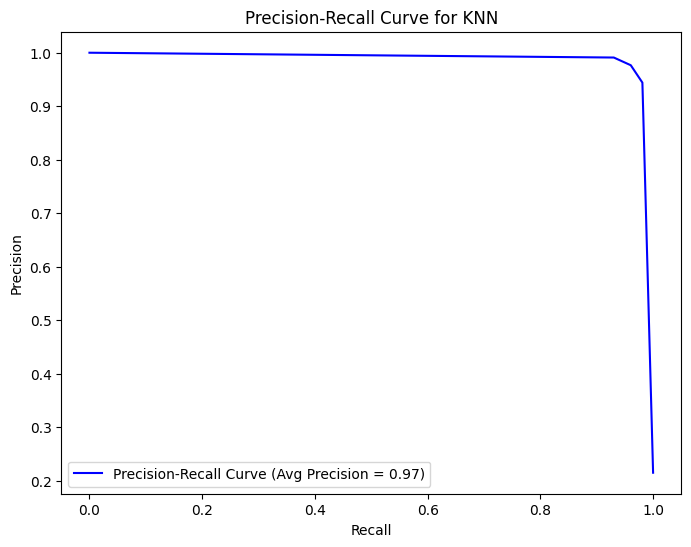

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25462, number of negative: 92104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14794
[LightGBM] [Info] Number of data points in the train set: 117566, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216576 -> initscore=-1.285731
[LightGBM] [Info] Start training from score -1.285731
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25462, number of negative: 92104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14794
[LightGBM] [Info] Number of data points in the train set: 117566, number of 

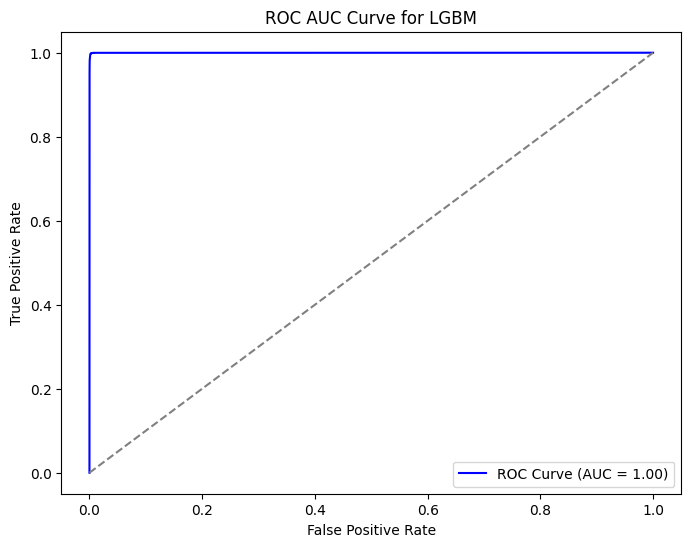

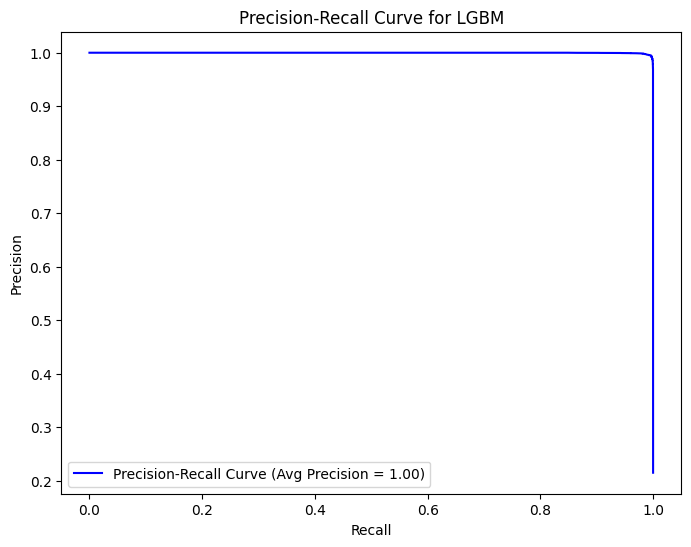

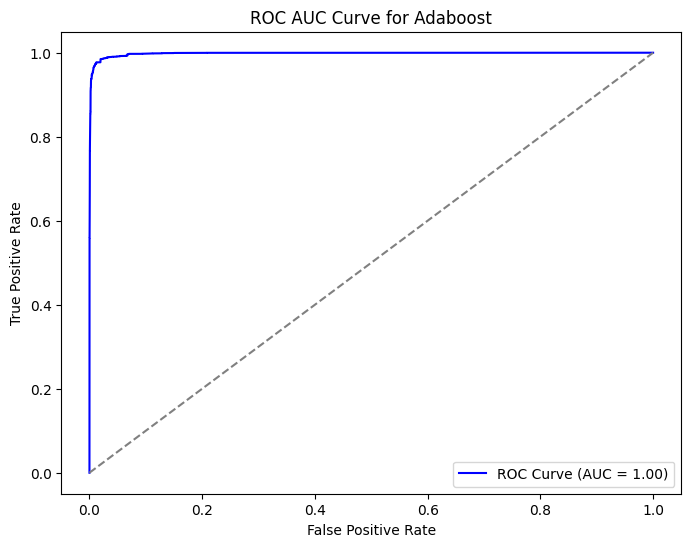

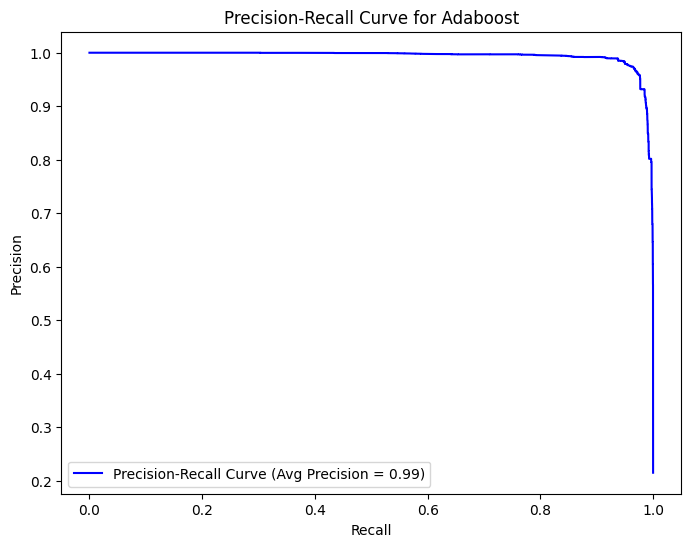

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solve

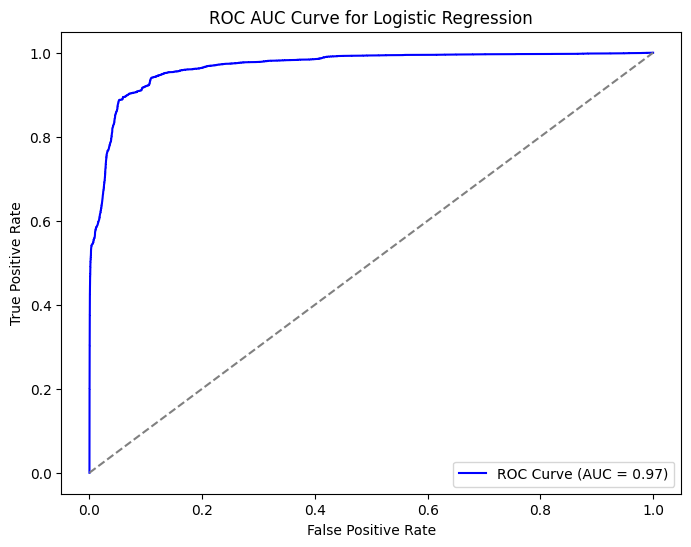

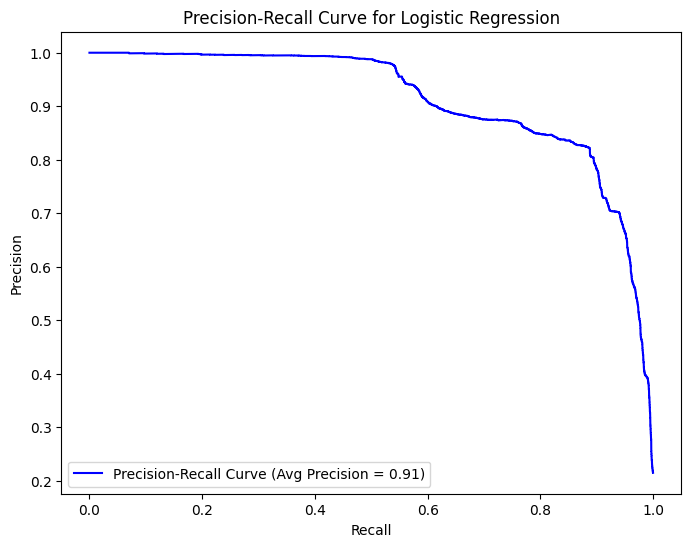

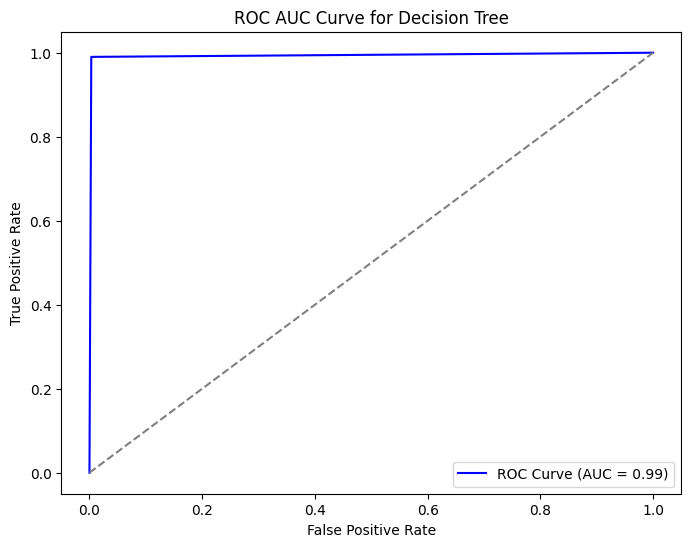

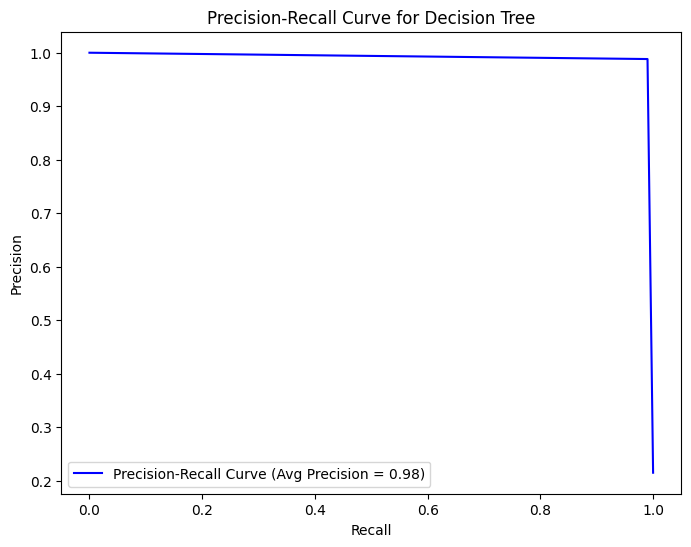

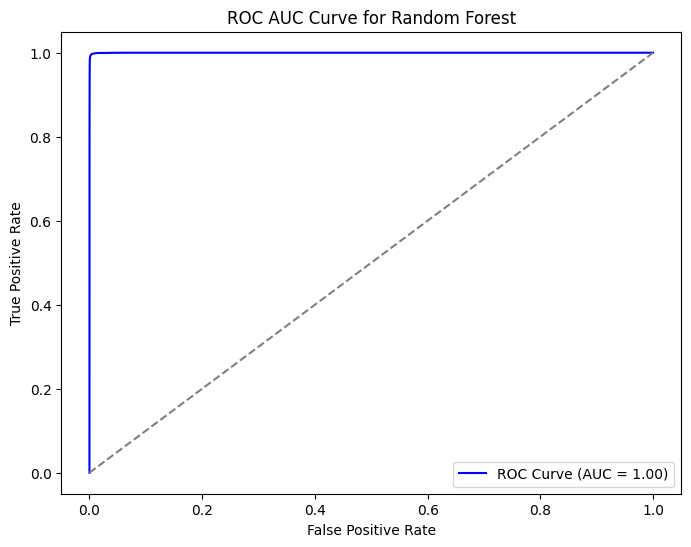

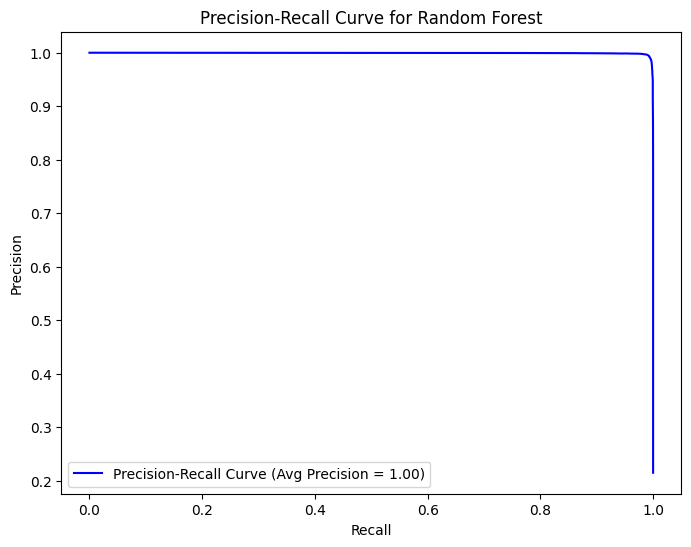

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


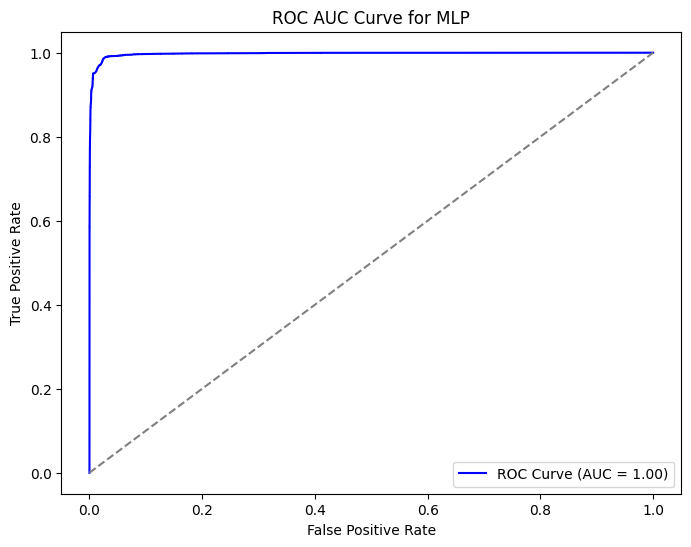

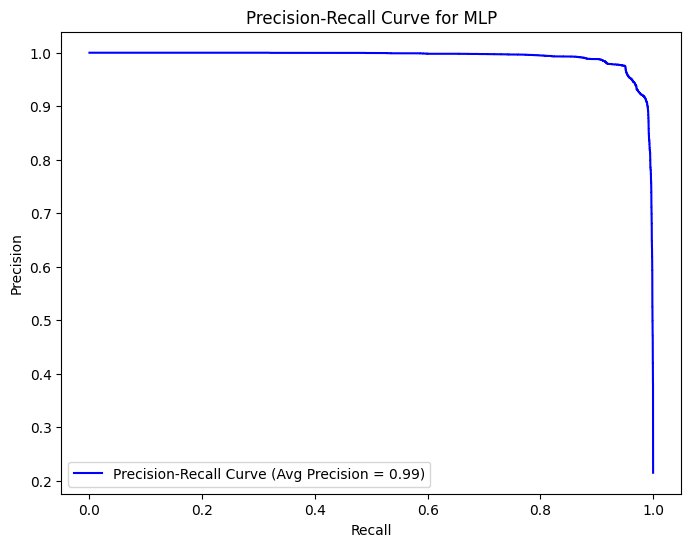

In [15]:
hyper_results = []
best_params = {}
for param in param_by_model:
    model_name = param['model']['model_name']
    actual_model = param['model']['actual_model']
    param_grid = param['param_grid']
    grid_search = GridSearchCV(actual_model, param_grid, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    result = estimateResult(best_model, X_train, y_train, X_test, y_test,model_name)
    hyper_results.append(result)
    # Save trained model
    joblib.dump(best_model, f'{model_name.replace(" ", "_")}_model.pkl')

Plotting curves just to make sure model is not overfitting

In [16]:
hyperparam_results_df = pd.DataFrame(hyper_results)

In [18]:
# Display results
display(hyperparam_results_df)

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate
0,XGB,0.997962,0.993426,0.997103,0.995261,0.001803
1,SVC,0.963925,0.933568,0.895630,0.914206,0.017414
2,KNN,0.986565,0.976598,0.960409,0.968436,0.006288
3,LGBM,0.997928,0.993425,0.996942,0.995180,0.001803
4,Adaboost,0.985667,0.978306,0.954374,0.966191,0.005783
5,Logistic Regression,0.922945,0.872440,0.750704,0.807007,0.029991
6,Decision Tree,0.995337,0.988194,0.990102,0.989147,0.003232
7,Random Forest,0.997030,0.993000,0.993160,0.993080,0.001913
8,MLP,0.982075,0.963533,0.952523,0.957996,0.009850


Results don't vary much from non parameterized results

In [19]:
# Save results to CSV
hyperparam_results_df.to_csv('hyper_model_results.csv', index=False)

In [20]:
# Save best hyperparameters to a file
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Model', 'Best Parameters'])
best_params_df.to_csv('best_hyperparameters.csv')

In [21]:
display(best_params_df)

,Model,Best Parameters
0,XGB,{'n_estimators': 100}
1,SVC,{'C': 10}
2,KNN,{'n_neighbors': 3}
3,LGBM,{'n_estimators': 100}
4,Adaboost,{'n_estimators': 100}
5,Logistic Regression,{'penalty': 'l2'}
6,Decision Tree,{'max_depth': None}
7,Random Forest,"{'max_depth': None, 'n_estimators': 100}"
8,MLP,"{'hidden_layer_sizes': (100,)}"
